# 不等流計算2:一般断面の不等流計算

## はじめに

 - 下図のような実河川のような横断面形状は一般断面や自然河道断面と呼ばれる。前項では矩形断面を対象として不等流計算を行ったが本項では一般断面を対象とする。
 - このような実務者向けの計算テクニックは一部水理公式集、河川砂防技術基準などに記述はあるのものの参考書籍が少ない。

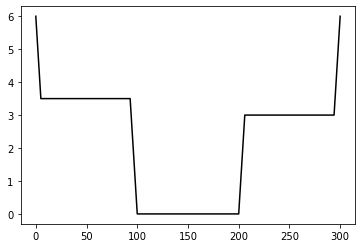

In [3]:
import matplotlib.pyplot as plt
x=[0, 5,93,100,200,206,294,300]
y=[6, 3.5, 3.5,  0,  0,  3,  3,  6]
plt.plot(x,y, c='k')
plt.show()                # 描画

## 基礎式

一般断面の不等流計算の基礎式は次式を用いる。

$$
\begin{align}
& \dfrac{d}{dx}\left( \frac{Q^2}{2gA^2} + H \right) = -\dfrac{\tau}{\rho g A} 
\end{align}
$$

ここに、$Q$:流量、$H$：水位、$A$：河積、$\tau$：コントロールボリュームに作用する力とする。

前項で示した矩形断面の式と比較して以下の変更を行っている。
 - エネルギー保存則をベースとした式形としたが、一般断面の計算では摩擦損失以外の抵抗を考慮するため、運動量保存則をベースとした式形とした。それにより、右辺の生成項の式形が変更されている。
 - $h+z_b$(圧力項+重力項)を$H$に書き換えている。

後者について補足すると、
例えば、下図のように、WL1、WL2と2つの水位が与えらた場合にそれぞれ$h,z_b$は定義できるだろうか。
それぞれの定義は難しい上に$z_b$は水位によって変わることが理解できる。これが、一般断面の大きな特徴であり、水位に応じて理論的な（物理的に意味を持つ）河床高が変わる。
$h,z_b$の2変数を同時に解くことはできないため、$h+z_b \equiv H$として$H$のみを変数として計算を行なう。


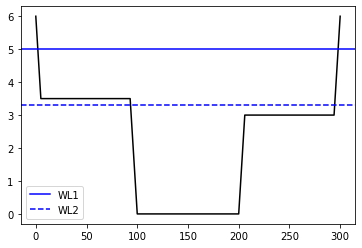

In [4]:
import matplotlib.pyplot as plt
x=[0, 5,93,100,200,206,294,300]
y=[6, 3.5, 3.5,  0,  0,  3,  3,  6]
plt.plot(x,y,c='k')
plt.axhline(y=5,c='b',label='WL1')
plt.axhline(y=3.3,c='b',ls='dashed',label='WL2')
plt.legend()
plt.show()                # 描画

マニング則についても以下のとおり若干の変更を加える。

$$
\begin{align}
 v &= \dfrac{1}{n}i_e^{1/2}R^{2/3} \\
 Q &= \dfrac{1}{n}i_e^{1/2}\dfrac{A^{5/3}}{S^{2/3}} \\
 Q &= K i_e^{1/2} \\
 K &\equiv \dfrac{A^{5/3}}{nS^{2/3}} 
\end{align}
$$

ここに、$Q$:流量、$H$：水位、$A$：河積、$v$：流速、$R=A/S$：径深、$S$：潤辺、$K$：通水能、$n$：マニングの粗度係数とする。

水位$A$、潤辺$S$、（見かけの）粗度係数$n$は、水位$H$の関数となる。式の簡略化のため、これらを合わせた通水能$K$を用いることがある。

運動方程式の生成項が摩擦損失のみの場合、マニング則を用いると以下のとおりになる。

$$
\begin{align}
 \dfrac{\tau}{\rho g A} = \dfrac{Q^2}{K^2}
\end{align}
$$

## 限界水深、等流水深の定義

一般断面の基礎式を用いて、限界水深、等流水深を矩形断面と同様に定義で設定することは難しいため、便宜的に以下のとおりに設定する。

### 等流水深

全ての損失による水頭の勾配が河床勾配$i_b$と釣り合う状態を等流と定義してその水深を等流水深とする。
なお、一般断面では水深を用いないため、正確には等流水深時の水位となる。

$$
\begin{align}
 \dfrac{\tau}{\rho g A} = i_b
\end{align}
$$

生成項が摩擦損失のみの場合は、

$$
\begin{align}
 \dfrac{Q^2}{K^2} = i_b
\end{align}
$$

となり、これを満足する水位$H$を反復法などにより求めれば良い。


### 限界水深

フルード数が1となる水位を限界水深時の水位とする。

フルード数は、

$$
\begin{align}
    Fr =  \dfrac{Q}{A\sqrt{gh}}
\end{align}
$$

となるが、平方根の中に水深$h$が含まれるため、そのままでは計算できない。

そのため、水深$h$の代替として径深$R=A/S$を使用することが多い。その他には$A/B$を用いることもある。

参考：[FORUM8ソフトウェア：等流・不等流の計算・3DCAD Ver.9 Q&A](https://www.forum8.co.jp/faq/win/futoryuqa.htm#q1-1)

## 離散化

離散化は次式となる。
なお、$i$:上流側、$i-1$:下流側とする。

$$
\begin{align}
  \left(\frac{Q^2}{2gA^2_i} + H_i  \right) 
-\left( \frac{Q^2}{2gA_{i-1}^2} + H_{i-1}  \right) 
= \dfrac{1}{2}\left(\dfrac{Q^2}{K_i^2} + \dfrac{Q^2}{K_{i-1}^{2}}\right)\Delta x
\end{align}
$$

常流の場合、下流から逐次計算を行なうため未知数は$H_i$のみとなる。

## 数値計算方法

一般断面の場合、離散式の未知数$H_i$による微分が難しいため、ニュートン法が使いづらい。そのため、二分法を使用することをおすすめする。（もちろんニュートン法を使っても良い。)

## 数値計算方法2：断面特性（河積、潤辺）の計算方法

河道断面の座標を次図のように定義する。

![A](https://computational-sediment-hyd.github.io/HydraulicsTips-in-CivilEngineer/fig/secttex.svg)

河積$A$,潤辺$S$,径深$R$は次式で計算する。

$$
\begin{align}
S_i &= \sqrt{(L_{i+1}-L_i)^2 + (Z_{i+1}-Z_i)^2} \\
A_i &= \left[H-0.5(Z_{i+1}+Z_i)\right](L_{i+1}-L_i) \\
S &= \sum_{i=1}^{imax-1} \!\! S_i \\
A &= \sum_{i=1}^{imax-1} \!\! A_i \\
R &= \dfrac{ A }{ S }\\
\end{align}
$$

ここでは、水際位置と座標定義点が同一であるが、実計算ではその限りではないため、水面と河道断面の交点を求めて計算する必要がある。詳細は後述するプログラムを参考いただきたい。

## 数値計算方法3：（見かけの）粗度係数の計算方法

ここまでは河道断面内で粗度係数が一定であることを前提としたが、上図のとおり、断面内で粗度係数が異なる場合について考える。

各点間の粗度係数に潤辺の重みに付けて、次式によって見かけの粗度係数$n'$を設定する。

$$
\begin{align}
n' &= \left( \dfrac{  \displaystyle \sum_{i=1}^{imax-1} S_i n_i^{3/2}}{ \displaystyle \sum_{i=1}^{imax-1} S_i } \right)^{2/3} 
\end{align}
$$

この方法は平均流速公式1a、$n'$は合成粗度係数と呼ばれる。

当然ではあるが水位によって見かけの粗度係数は変わる。